  #                            深度学习入门:基于python的理论和实践


## *第二章：感知机*

## $2.1$ $ 感知机是什么$

## *$感知机是一种能够接受多个信号，通过权重分配和条件判断输出信号的一种算法。信号只有0/1(x1,x2),权重由w1和w2表示，判断条件为[x1,x2]*[w1,w2]?θ,输出信号同样只有0/1$*

##  $感知机原理的表达式：$

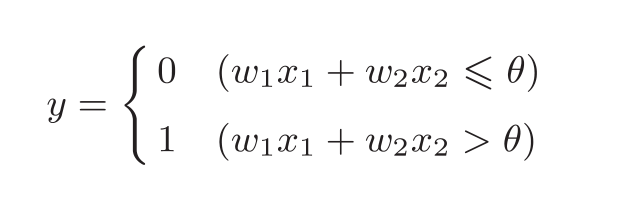

# ***2.2 简单逻辑电路***

## $简单逻辑电路包括与门(AND gate)、与非门(NAND gate)、或门(OR gate);三个逻辑电路所对应输出信号的条件不同$

##  $2.2.1 与门 (当且仅当x1和x2两个输入信号均为1时，输出信号才为1，否则为0）$
## $与门逻辑电路对应的真值表$
$\Downarrow$ $\Downarrow$ $\Downarrow$ $\Downarrow$

|x1   x2||   y|
|:-----------:||:------------|
|0     0||0|
|1     0||0|
|0     1||0|
|1     1||1|

## $当我们要设计这三种逻辑电路的感知机时，可通过建立线性方程组转化为符合条件的线性规划$

## $[1] θ>=0 ;[2]w1<=θ ;[3]w2<=θ ;[4]w1+w2>θ.$
### *取定θ=0.7，此时满足条件的点集位于实蓝绿轴和红虚轴围成的区域:*

## $2.2.2 与非门和或门(与非门是与门的取反,或门的输出条件为两次输入均不为1)$

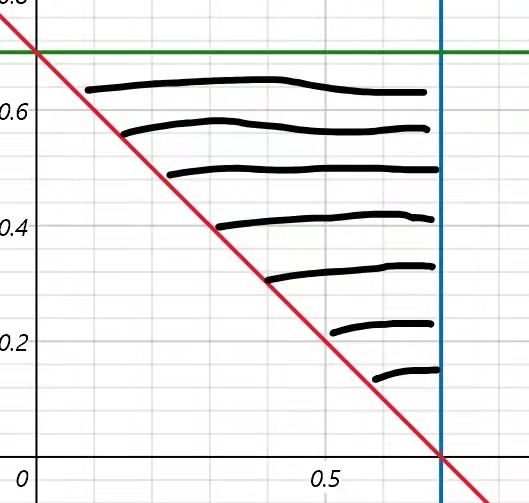

## 与非门和或门感知机的实现：
## 与非门$\longrightarrow$ [1]θ<0;[2]w1>=θ;[3]w2>=θ;[4]w1+w2<θ。取θ=-0.7,此时规划区域是与门的取反
## 或门$\longrightarrow$ [1]θ>=0;[2]w1>θ;[3]w2>θ;[4]w1+w2>θ。取θ=0.8，区域为蓝绿实线围成区域。
### 或门的线性规划：

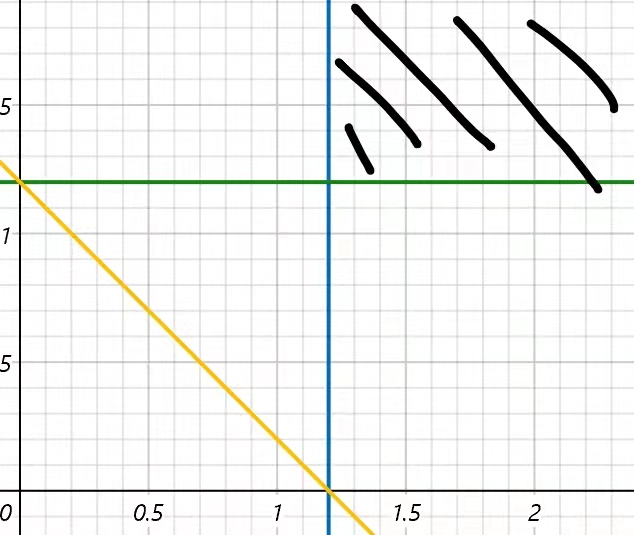

# ***2.3感知机的实现(python语句判断条件)***

## $2.3.1 简单的实现$

#### 与门感知机

In [1]:
def AND(x1,x2):
    w1,w2,theta=0.6,0.6,0.7#根据线性规划制定接收器参数
    temp=x1*w1+x2*w2
    if temp<=theta:#不输出的条件
        return 0
    elif temp>theta:#输出的条件
        return 1#return的值表示输出信号的值
print(AND(0,0))
print(AND(0,1))#检验与门感知机
print(AND(1,0))
print(AND(1,1))

0
0
0
1


#### 与非门感知机

In [2]:
def NAND(x1,x2):
    w1,w2,theta=-0.6,-0.6,-0.7
    temp=x1*w1+x2*w2
    if temp<=theta:
        return 0
    elif temp>theta:
        return 1
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


#### 或门感知机

In [3]:
def OR(x1,x2):
    w1,w2,theta=0.9,0.9,0.8
    temp=x1*w1+x2*w2
    if temp<=theta:
        return 0
    elif temp>theta:
        return 1
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


## $2.3.2 导入权重和偏置(将阈值改写成偏置，定理的本质不变)$
### 改写形式：其中b=-θ

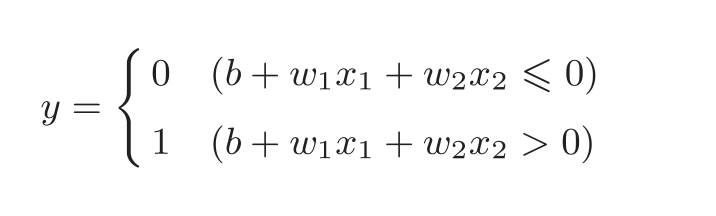

###  w1*x1+w2*x2—信号和权重矩阵相乘$\longrightarrow$X=[x1,x2];W=[w1,w2]$\longrightarrow$ $$\vec{X} \cdot \vec{W}$$ =w1*x1+w2*x2 因此可以导入python的numpy库改写判断条件

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 15 

@author: wangchen
"""

import numpy as np#导入numpy库
b=-0.8
X=np.array([1,1])
W=np.array([0.5,0.5])
print(np.sum(X*W)+b)#b+x1*w1+x2*w2

0.19999999999999996


## $2.3.3 使用权重和配置的实现(定义一个接受器，内部由numpy实现）$

#### *使用权重和配置实现与门*

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 15 

@author: wangchen
"""
import numpy as np
b=-0.7#偏置
W=np.array([0.5,0.5])#权重矩阵
def AND(x1,x2):
    X=np.array([x1,x2])
    temp=np.sum(X*W)+b
    if temp<=0:
        return 0
    elif temp>0:
        return 1
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


#### *使用权重和配置实现与非门*

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 15 

@author: wangchen
"""
import numpy as np
b=0.7
W=np.array([-0.5,-0.5])
def NAND(x1,x2):
    X=np.array([x1,x2])
    temp=np.sum(X*W)+b
    if temp<=0:
        return 0
    elif temp>0:
        return 1
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


#### 使用权重和配置实现或门

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 15 

@author: wangchen
"""
import numpy as np
b=-0.8
W=np.array([0.9,0.9])
def OR(x1,x2):
    X=np.array([x1,x2])
    temp=np.sum(X*W)+b
    if temp<=0:
        return 0
    elif temp>0:
        return 1
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


#  ***2.4感知机的局限性***

## $2.4.1异或门(无法用线性感知机实现)$

## $异或门的输出信号1的条件是当且仅当x2和x1中只有一个为1，否则为0$

### 异或门对应的真值表:

|x1    x2||y|
|:--------:||:--------:|
|0     0||0|
|1     0||1|
|0     1||1|
|1     1||0|

## $根据原始的定理画出规划区域:$

##  [1]θ>=0;[2]w1>θ;[3]w2>θ;[4]w1+w2<=θ $\longrightarrow$ 取θ=0.6

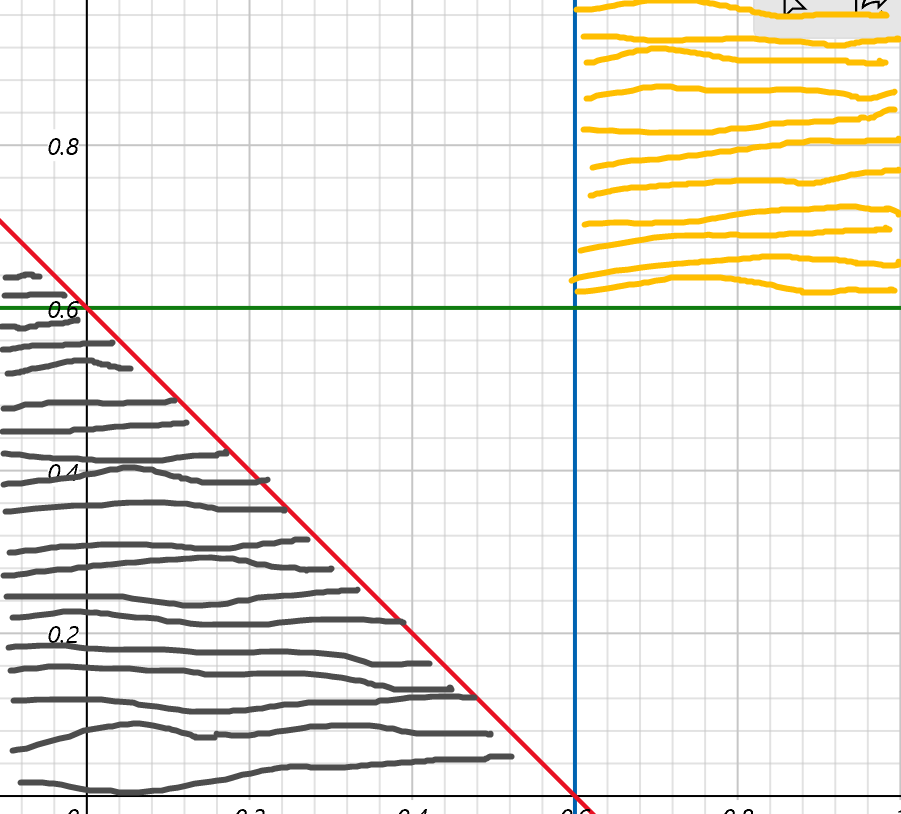

### 黑色和黄色两个区域无交集，因此无解

## $2.4.2线性和非线性(由直线分割而成的空间叫线性空间,由曲线分割的空间叫做非线性空间)$

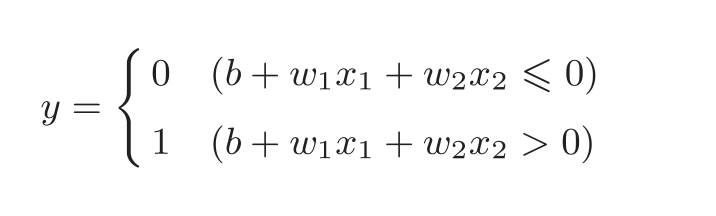

## $改写后的式子中b+w1x1+w2x2看作线性空间的分隔曲线，两个空间必须包含满足只有输出或输入的点才能实现感知机$

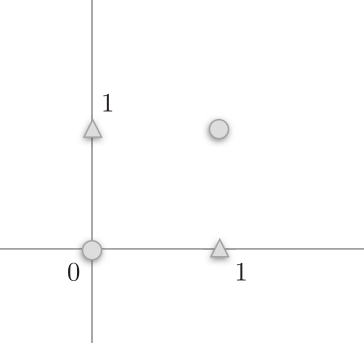

### 无法用一条直线同时分割隔离出⭕和🔺，线性空间无法实现

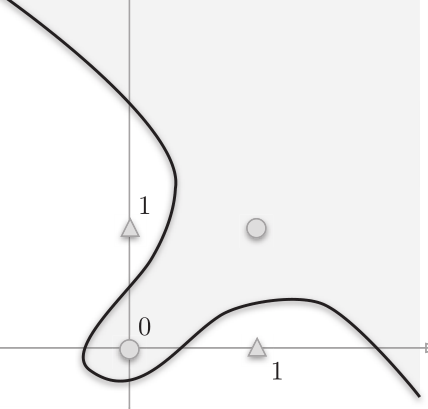

### 分割线采取其他非线性函数比如sigmod激活函数,可以将⭕和🔺同时分离

# ***2.5多层感知机***

## $上层感知机的输出结果作为下一层的输入，有着递推的关系，能够分离非线性空间。$

## $2.5.1 已有门电路的组合$

## $单层的感知机无法实现异或门，可以通过组合多层线性感知机实现(与门、与非门和或门)$

### ***异或门对应的多层逻辑电路***
$\Downarrow$    $\Downarrow$    $\Downarrow$    $\Downarrow$    $\Downarrow$     $\Downarrow$

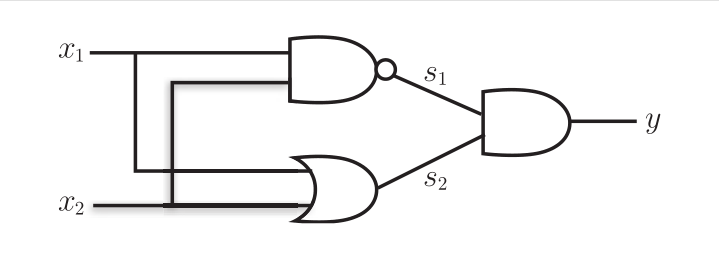

### 每层感知机的输入和输出$\Rightarrow$$\Rightarrow$
|x1   x2||s1   s2||   y|
|:-------:||:-------:||:-------:|
|0     0||   1    0||    0|
|1     0||   1    1||    1|
|0     1||   1    1||    1|
|1     1||   0    1||    0|


## $2.5.2异或门的实现$

#### 通过python分别创建与、与非、或的函数块，再根据多层逻辑电路组合函数块实现异或门
$\Downarrow$   $\Downarrow$  $\Downarrow$   $\Downarrow$   $\Downarrow$   $\Downarrow$

In [2]:
"""
Created on Thu Mar 17 

@author: wangchen
"""
import numpy as np
b_AND=-0.7
w1=np.array([0.5,0.5])
b_NAND=0.7
w2=np.array([-0.5,-0.5])#分别确定与、与非、或门的偏置和权重矩阵
b_OR=-0.8
w3=np.array([0.9,0.9])
def AND(x1,x2):
    X1=np.array([x1,x2])
    if np.sum(X1*w1)+b_AND>0:#创建与门
        return 1
    else:
        return 0
def NAND(x3,x4):
    X2=np.array([x3,x4])
    if np.sum(X2*w2)+b_NAND>0:#创建与非门
        return 1
    else:
        return 0
def OR(x4,x5):
    X3=np.array([x4,x5])
    if np.sum(X3*w3)+b_OR>0:#创建或门
        return 1
    else:
        return 0
def XOR(x5,x6):
    s1=NAND(x5,x6) #相当于3个组件组成了异或门,根据异或门的逻辑电路将与门的两个输入分别对应与非和或的输出  
    s2=OR(x5,x6)
    y=AND(s1,s2)#实现嵌套
    return y
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


### 叠加多个单层的感知机构成多层感知机，能进行更灵活的表示。异或门是三层感知机(根据权重可划分为二层) 

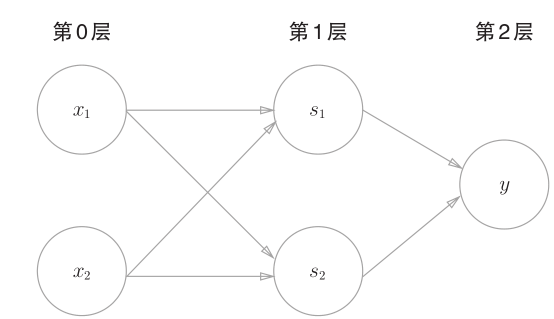

# ***2.6从与非门到计算机***

### $·多层感知机有着多个值为0和1的输入，且输出值也为0和1，与计算机类似的是，计算机运行的本质也是处理01数据流，经过分析输出另一01数据流。$
### $·对于给定的01输入数据流有n个数，需要输出对应同等个数的01数据流形成的空间是n维空间的一个子空间，理论上用两层感知机并且在激活函数的作用下能实现所有函数(分隔曲线)分离出只含有输出0或1的空间,即实现计算机的所有功能，激活函数sigmod得益于其有界性和对称性等良好的特性足以调和。$

####   sigmod激活函数$\Rightarrow$ $\Rightarrow$

### $f(x)=$$\frac{1}{1+e^{-x}}$

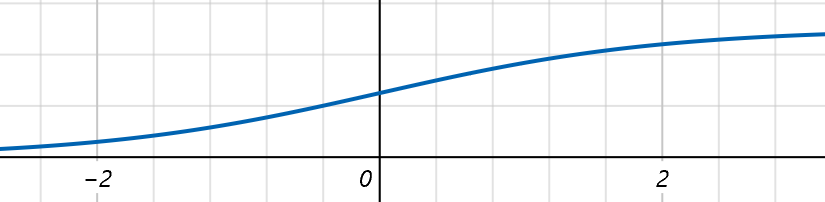

# ***2.7小结***

#### • 感知机是具有输入和输出的算法，根据不同的实现条件输出不同值。
#### • 感知机将权重和偏置设定为参数，改写后判断条件在空间中更加直观.
#### • 使用感知机可以表示与门和或门等逻辑电路,非线性逻辑电路只能用多层感知机实现。
#### • 异或门无法通过单层感知机来表示，单层感知机只能分割线性空间，异或门的解为非线性空间。
#### • 使用2层感知机可以表示异或门(第一层为或门、与非门，第二层为与门).
#### • 单层感知机只能表示线性空间，而多层感知机可以表示非线性空间。
#### • 多层感知机（在理论上）可以表示计算机(需要激活函数实现)。